## Comparision between the size of basal contacts of CBCX and OFF-CBCs

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import rpy2
%matplotlib inline
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rcParams.update({'mathtext.default': 'regular'})
matplotlib.rcParams.update({'font.size': 14})
sns.set_style("whitegrid")

In [2]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [3]:
#import r package
r_stats = importr('stats')
r_base = importr('base')
r_lme4 = importr('lme4')

In [4]:
xbc_contacts=np.loadtxt('data/CBCX_contact_classification.csv',delimiter=',',usecols=range(4))
xbc_contacts=pd.DataFrame(xbc_contacts,columns=['cell','cone','type','class'])

In [5]:
on_contacts_xbc_comp=np.loadtxt('data/CBCX_ON_CBC_contact_comparison.csv',delimiter=',',usecols=range(4))
on_contacts_xbc_comp=pd.DataFrame(on_contacts_xbc_comp,columns=['cell','cone','type','class'])

In [6]:
stat_xbc_contacts=pd.DataFrame(np.concatenate((np.tile(np.unique(xbc_contacts['cell']),3).reshape(-1,1),\
                                               np.repeat(np.arange(3),np.unique(xbc_contacts['cell']).shape[0]).reshape(-1,1)),axis=1),columns=['cell','class'])
for i in range(stat_xbc_contacts.shape[0]):
    stat_xbc_contacts.loc[i,'count']=np.sum((xbc_contacts['cell']==stat_xbc_contacts.ix[i,'cell'])&\
                                                   (xbc_contacts['class']==stat_xbc_contacts.ix[i,'class']))    

In [7]:
stat_on_contacts=pd.DataFrame(np.concatenate((np.tile(np.unique(on_contacts_xbc_comp['cell']),3).reshape(-1,1),\
                                               np.repeat(np.arange(3),np.unique(on_contacts_xbc_comp['cell']).shape[0]).reshape(-1,1)),axis=1),columns=['cell','class'])
for i in range(stat_on_contacts.shape[0]):
    stat_on_contacts.loc[i,'count']=np.sum((on_contacts_xbc_comp['cell']==stat_on_contacts.ix[i,'cell'])&\
                                                   (on_contacts_xbc_comp['class']==stat_on_contacts.ix[i,'class']))   

In [8]:
tip_invag_joined=pd.concat({'CBCX': stat_xbc_contacts, 'ON-CBC': stat_on_contacts})
tip_invag_joined=tip_invag_joined.reset_index().drop('level_1',axis=1).rename(columns={'level_0':'BC_type'})
tip_invag_joined=tip_invag_joined[tip_invag_joined['class']>0].reset_index().drop('index',axis=1)
tip_invag_joined['contact']='invag.'
tip_invag_joined.loc[tip_invag_joined['class']==2,'contact']='tip'
tip_invag_joined=tip_invag_joined.drop('class',axis=1)
tip_invag_joined['cell']=tip_invag_joined['cell'].astype(int).astype(str)

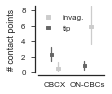

In [9]:
sns.set(font='Arial',style='white',context='paper',rc={"xtick.major.size": 0, "ytick.major.size": 4})
with matplotlib.rc_context({"lines.linewidth": 0.7}):
    plt.figure(figsize=(3/2.54,3/2.54))
    ax=sns.pointplot(x='BC_type',y='count',data=tip_invag_joined,hue='contact',order=['CBCX','ON-CBC']\
                   ,ci=95,palette=[np.array([0.8,0.8,0.8,1.]),np.array([0.4,0.4,0.4,1.])],linestyles='',markers='s',dodge=-0.2)
    ax.set_xticklabels(['CBCX','ON-CBCs'])
    ax.set(ylabel='# contact points',xlabel='',ylim=(0,8.5),yticks=[0,2,4,6,8])
    legend=plt.legend(bbox_to_anchor=(.8, 1))
    ax.spines['left'].set_position(('outward',3))
    ax.spines['bottom'].set_position(('outward',3))
    sns.despine()
#     plt.savefig('figures/xbc_on_comparison5.svg',bbox_inches='tight',dpi=300)
    plt.show()

In [10]:
#get r object
r_tip_invag=pandas2ri.py2ri_pandasdataframe(tip_invag_joined)

In [11]:
#fit model
r_model=r_lme4.glmer('count ~ BC_type*contact+(1|cell)',data=r_tip_invag,family="poisson")
r_pred=pandas2ri.py2ri_pandasdataframe(tip_invag_joined[['cell','BC_type','contact']])
r_count=r_stats.predict(r_model,r_pred,type='response')

In [12]:
pred=tip_invag_joined.copy()
pred['count']=pandas2ri.ri2py(r_count)
merged = pd.concat(dict(data=tip_invag_joined,mixed=pred),names=['type']).reset_index()

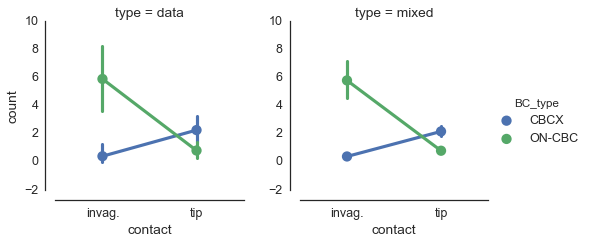

In [13]:
sns.set(font='Arial',style='white',context='notebook',font_scale=1.25)
g = sns.factorplot('contact', 'count', 'BC_type', 
                   data=merged, 
                   col='type',
                   kind='point',
                   size=3.5)
g.fig.subplots_adjust(wspace=0.3)
sns.despine(offset=10);
# plt.savefig('figures/XBC_contact_model.png',bbox_inches='tight',dpi=300)

In [14]:
print(r_base.summary(r_model))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: count ~ BC_type * contact + (1 | cell)
   Data: structure(list(BC_type = structure(c(1L, 1L, 1L, 1L, 1L, 1L,  
1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L,  
2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L, 2L 
), .Label = c("CBCX", "ON-CBC"), class = "factor"), cell = structure(c(7L,  
8L, 9L, 10L, 11L, 12L, 13L, 7L, 8L, 9L, 10L, 11L, 12L, 13L, 1L,  
2L, 3L, 4L, 5L, 6L, 14L, 15L, 16L, 17L, 18L, 19L, 1L, 2L, 3L,  
4L, 5L, 6L, 14L, 15L, 16L, 17L, 18L, 19L), .Label = c("543",  
"550", "566", "574", "590", "596", "603", "604", "605", "606",  
"607", "608", "609", "624", "640", "658", "671", "687", "689" 
), class = "factor"), count = c(0, 0, 3, 0, 0, 0, 0, 4, 4, 2,  
3, 1, 1, 1, 10, 10, 2, 1, 7, 2, 2, 3, 7, 4, 8, 15, 2, 0, 2, 0,  
3, 1, 1, 0, 0, 0, 0, 1), contact = structure(c(1L, 1L, 1L, 1L,  
1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, 2L, 2L